In [1]:
import os
import sys
import traceback

import natsort
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
import numpy as np
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
import seaborn as sns
# sys.path.append(os.path.realpath(os.path.join('C:\\acconeer\\gui_tool\\acconeer-python-exploration\\gui\\comparision.ipynb', "../")))
# sys.path.append('C:\\acconeer\\gui_tool\\acconeer-python-exploration\\gui\\ml')
# sys.path.append('C:\\acconeer\\gui_tool\\acconeer-python-exploration')
sys.path.append('/home/joongho/Intelligent_Radar/gui/ml')
sys.path.append('/home/joongho/Intelligent_Radar')
print(sys.path)
# from acconeer.exptool import configs
try:
    # from acconeer.exptool import imock, utils
    from gui.ml import feature_processing as feature_proc  
    from gui.ml import keras_processing as kp
except Exception:
    print("Failed to import deeplearning libraries, please specify acconeer-exploration-folder!")
    exit(1)



['/home/joongho/Intelligent_Radar/gui', '/home/joongho/.conda/envs/radar/lib/python37.zip', '/home/joongho/.conda/envs/radar/lib/python3.7', '/home/joongho/.conda/envs/radar/lib/python3.7/lib-dynload', '', '/home/joongho/.local/lib/python3.7/site-packages', '/home/joongho/.conda/envs/radar/lib/python3.7/site-packages', '/home/joongho/.conda/envs/radar/lib/python3.7/site-packages/IPython/extensions', '/home/joongho/.ipython', '/home/joongho/Intelligent_Radar/gui/ml', '/home/joongho/Intelligent_Radar']
Tensorflow version 2.7.0 detected
Tensorflow version 2.7.0 detected


In [2]:
# path_dir = 'C:\\acconeer\\gui_tool\\acconeer-python-exploration\\data\\2021_10_25'
path_dir = '/home/joongho/Intelligent_Radar/data/2021_11//Train'
 
file_list = os.listdir(path_dir)
file_list = natsort.natsorted(file_list)
file_path = list()
for file in range(len(file_list)):
    file_path.append(path_dir + '/' + file_list[file])

In [3]:
print(file_list)

['Can1.npy', 'Can2.npy', 'Can3.npy', 'Can4.npy', 'Can5.npy', 'Can6.npy', 'Can7.npy', 'Can8.npy', 'Can9.npy', 'Glass1.npy', 'Glass2.npy', 'Glass3.npy', 'Glass4.npy', 'Glass5.npy', 'Glass6.npy', 'Glass7.npy', 'Glass8.npy', 'Glass9.npy', 'Paper1.npy', 'Paper2.npy', 'Paper3.npy', 'Paper4.npy', 'Paper5.npy', 'Paper6.npy', 'Paper7.npy', 'Paper8.npy', 'Paper9.npy', 'Plastic1.npy', 'Plastic2.npy', 'Plastic3.npy', 'Plastic4.npy', 'Plastic5.npy', 'Plastic6.npy', 'Plastic7.npy', 'Plastic8.npy', 'Plastic9.npy']


In [4]:
file_name_list = list()
for file in file_list:
    for i in range(30):
        file_name_list.append(file)

In [5]:
ML = kp.MachineLearning()
data = ML.load_train_data(file_path)
print(file_path)
training_data = ML.training_data

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)

Initiating model with 4x1 inputs and 4 outputs
No layers defined!
['/home/joongho/Intelligent_Radar/data/2021_11//Train/Can1.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can2.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can3.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can4.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can5.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can6.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can7.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can8.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Can9.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Glass1.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Glass2.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Glass3.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Train/Gla

2021-12-02 17:53:31.267607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 17:53:31.292264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 17:53:31.292480: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 17:53:31.293087: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
test_path = '/home/joongho/Intelligent_Radar/data/2021_11//Test'
test_file_list = os.listdir(test_path)
test_file_path = list()
for file in range(len(test_file_list)):
    test_file_path.append(test_path + '/' + test_file_list[file])
print(test_file_path)

['/home/joongho/Intelligent_Radar/data/2021_11//Test/ml_session_data_2021_11_29_2220_Can1.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Test/ml_session_data_2021_11_29_2214_Can2.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Test/ml_session_data_2021_11_29_2222_Paper1.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Test/ml_session_data_2021_11_29_2225_Plastic2.npy', '/home/joongho/Intelligent_Radar/data/2021_11//Test/ml_session_data_2021_11_29_2217_Plastic1.npy']


In [7]:
test_ML = kp.MachineLearning()
test_data_all = test_ML.load_train_data(test_file_path)
test_data = test_ML.training_data

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)

Initiating model with 4x1 inputs and 3 outputs
No layers defined!


In [8]:
def heatmap(matrix,title):
    df=DF(matrix,index=["Can","Glass","Paper","Plastic"],columns=["Can","Glass","Paper","Plastic"])
    plt.figure(figsize=(10,10))
    sns.heatmap(df, annot=True)
    plt.tick_params(axis='x', top=True, labeltop = True,bottom=False, labelbottom=False)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xlabel("Prediction",position = (0.5,1.0+0.05))
    plt.ylabel("Object")
    plt.title(title) 

In [9]:
# normalization
def normalization(arr):
    normalized_arr = np.zeros_like(arr)
    max = np.zeros(len(arr[0]))
    min = np.zeros(len(arr[0]))
    for i in range(len(arr[0])):
        for j in range(len(arr)):
            if arr[j][i] > max[i]:
                max[i] = arr[j][i]
            if arr[j][i] < min[i]:
                min[i] = arr[j][i]
    for i in range(len(arr[0])):
        for j in range(len(arr)):
            normalized_arr[j][i] = (arr[j][i] - min[i])/(max[i]-min[i])
    return normalized_arr, min, max

In [10]:
# normalization
def normalization_test(arr, min, max):
    normalized_arr = np.zeros_like(arr)
    for i in range(len(arr[0])):
        for j in range(len(arr)):
            normalized_arr[j][i] = (arr[j][i] - min[i])/(max[i]-min[i])
    return normalized_arr

In [11]:
# label_converter
def label_convert(labels):
    converted_labels = np.zeros(len(labels))
    for i in range(len(labels)):
        for idx in range(len(labels[0])):
            if labels[i][idx] == 1:
                converted_labels[i] = idx
            else:
                pass
    return converted_labels

In [12]:
print(ML.labels_dict)

{'Can': 0, 'Glass': 1, 'Paper': 2, 'Plastic': 3}


In [13]:
X_train = training_data['x_data']
X_test = test_data['x_data']
Y_train = data['model_data']['y_labels']
Y_test = test_data_all['model_data']['y_labels']
X_train_nn, min, max = normalization(X_train)
# X_train_nn = normalization(X_train)
X_test_nn = normalization_test(X_test, min, max)
# X_test_nn = normalization(X_test)
Y_train_cf = label_convert(Y_train)
Y_test_cf = label_convert(Y_test)
X_train = np.reshape(X_train, (len(X_train), len(X_train[0])))
X_test = np.reshape(X_test, (len(X_test), len(X_test[0])))
X_train_nn = np.reshape(X_train_nn, (len(X_train_nn), len(X_train_nn[0])))
X_test_nn = np.reshape(X_test_nn, (len(X_test_nn), len(X_test_nn[0])))

In [14]:
column_names = ['Avg.Amp', 'Avg.total', 'Global.Max', 'Global.Min']
data_df = pd.DataFrame(X_train, columns=column_names)
data_df['Label'] = Y_train_cf
data_df['File_name'] = file_name_list

In [15]:
print(data_df)

      Avg.Amp  Avg.total  Global.Max  Global.Min  Label     File_name
0     -126.08  -30503.56         0.0    -65542.0    0.0      Can1.npy
1     -120.64  -25937.42      7705.0    -51350.0    0.0      Can1.npy
2     -120.00  -28216.28      7705.0    -57277.0    0.0      Can1.npy
3     -123.30  -26709.78     10401.0    -56379.0    0.0      Can1.npy
4     -119.98  -24479.84      3725.0    -56056.0    0.0      Can1.npy
...       ...        ...         ...         ...    ...           ...
1075   -13.90   55350.04     78463.0         0.0    3.0  Plastic9.npy
1076   -14.78   53411.10     76813.0         0.0    3.0  Plastic9.npy
1077   -15.86   56394.46     76654.0         0.0    3.0  Plastic9.npy
1078   -10.12   59070.34     79050.0         0.0    3.0  Plastic9.npy
1079   -13.86   56735.62     83622.0         0.0    3.0  Plastic9.npy

[1080 rows x 6 columns]


In [16]:
norm_Avg_Amp = (data_df.loc[:,'Avg.Amp'] - data_df.loc[:,'Avg.Amp'].min())/(data_df.loc[:,'Avg.Amp'].max()-data_df.loc[:,'Avg.Amp'].min())
norm_Avg_total = (data_df.loc[:,'Avg.total'] - data_df.loc[:,'Avg.total'].min())/(data_df.loc[:,'Avg.total'].max()-data_df.loc[:,'Avg.total'].min())
norm_Glob_min = (data_df.loc[:,'Avg.total'] - data_df.loc[:,'Avg.total'].min())/(data_df.loc[:,'Avg.total'].max()-data_df.loc[:,'Avg.total'].min())
norm_Glob_max = (data_df.loc[:,'Global.Max'] - data_df.loc[:,'Global.Max'].min())/(data_df.loc[:,'Avg.total'].max()-data_df.loc[:,'Avg.total'].min())

In [17]:
data_df['Avg.Amp.norm'] = norm_Avg_Amp
data_df['Avg.total.norm'] = norm_Avg_total
data_df['Glob.Max'] = norm_Glob_max
data_df['Glob.Min'] = norm_Glob_min

In [18]:
print(data_df)

      Avg.Amp  Avg.total  Global.Max  Global.Min  Label     File_name  \
0     -126.08  -30503.56         0.0    -65542.0    0.0      Can1.npy   
1     -120.64  -25937.42      7705.0    -51350.0    0.0      Can1.npy   
2     -120.00  -28216.28      7705.0    -57277.0    0.0      Can1.npy   
3     -123.30  -26709.78     10401.0    -56379.0    0.0      Can1.npy   
4     -119.98  -24479.84      3725.0    -56056.0    0.0      Can1.npy   
...       ...        ...         ...         ...    ...           ...   
1075   -13.90   55350.04     78463.0         0.0    3.0  Plastic9.npy   
1076   -14.78   53411.10     76813.0         0.0    3.0  Plastic9.npy   
1077   -15.86   56394.46     76654.0         0.0    3.0  Plastic9.npy   
1078   -10.12   59070.34     79050.0         0.0    3.0  Plastic9.npy   
1079   -13.86   56735.62     83622.0         0.0    3.0  Plastic9.npy   

      Avg.Amp.norm  Avg.total.norm  Glob.Max  Glob.Min  
0         0.166113        0.438642  0.000000  0.438642  
1        

In [19]:
test_data_df = pd.DataFrame()
train_data_df = pd.DataFrame()

In [20]:
Can1_data_df = data_df[data_df['File_name']=='Can1.npy']
Can1_test_data_df = Can1_data_df.iloc[:10, :]
Can1_train_data_df = Can1_data_df.iloc[10:, :]
Can2_data_df = data_df[data_df['File_name']=='Can2.npy']
Can2_test_data_df = Can2_data_df.iloc[:10, :]
Can2_train_data_df = Can2_data_df.iloc[10:, :]
Can3_data_df = data_df[data_df['File_name']=='Can3.npy']
Can3_test_data_df = Can3_data_df.iloc[:10, :]
Can3_train_data_df = Can3_data_df.iloc[10:, :]
Can4_data_df = data_df[data_df['File_name']=='Can4.npy']
Can4_test_data_df = Can4_data_df.iloc[:10, :]
Can4_train_data_df = Can4_data_df.iloc[10:, :]
Can5_data_df = data_df[data_df['File_name']=='Can5.npy']
Can5_test_data_df = Can5_data_df.iloc[:10, :]
Can5_train_data_df = Can5_data_df.iloc[10:, :]
Can6_data_df = data_df[data_df['File_name']=='Can6.npy']
Can6_test_data_df = Can6_data_df.iloc[:10, :]
Can6_train_data_df = Can6_data_df.iloc[10:, :]
Glass1_data_df = data_df[data_df['File_name']=='Glass1.npy']
Glass1_test_data_df = Glass1_data_df.iloc[:10, :]
Glass1_train_data_df = Glass1_data_df.iloc[10:, :]
Glass2_data_df = data_df[data_df['File_name']=='Glass2.npy']
Glass2_test_data_df = Glass2_data_df.iloc[:10, :]
Glass2_train_data_df = Glass2_data_df.iloc[10:, :]
Glass3_data_df = data_df[data_df['File_name']=='Glass3.npy']
Glass3_test_data_df = Glass3_data_df.iloc[:10, :]
Glass3_train_data_df = Glass3_data_df.iloc[10:, :]
Plastic1_data_df = data_df[data_df['File_name']=='Plastic1.npy']
Plastic1_test_data_df = Plastic1_data_df.iloc[:10, :]
Plastic1_train_data_df = Plastic1_data_df.iloc[10:, :]
Plastic2_data_df = data_df[data_df['File_name']=='Plastic2.npy']
Plastic2_test_data_df = Plastic2_data_df.iloc[:10, :]
Plastic2_train_data_df = Plastic2_data_df.iloc[10:, :]
Plastic3_data_df = data_df[data_df['File_name']=='Plastic3.npy']
Plastic3_test_data_df = Plastic3_data_df.iloc[:10, :]
Plastic3_train_data_df = Plastic3_data_df.iloc[10:, :]
Paper1_data_df = data_df[data_df['File_name']=='Paper1.npy']
Paper1_test_data_df = Paper1_data_df.iloc[:10, :]
Paper1_train_data_df = Paper1_data_df.iloc[10:, :]
Paper2_data_df = data_df[data_df['File_name']=='Paper2.npy']
Paper2_test_data_df = Paper2_data_df.iloc[:10, :]
Paper2_train_data_df = Paper2_data_df.iloc[10:, :]
Paper3_data_df = data_df[data_df['File_name']=='Paper3.npy']
Paper3_test_data_df = Paper3_data_df.iloc[:10, :]
Paper3_train_data_df = Paper3_data_df.iloc[10:, :]
test_data_df = test_data_df.append([Can1_test_data_df,
                                    Can2_test_data_df,
                                    Can3_test_data_df,
                                    Can4_test_data_df,
                                    Can5_test_data_df,
                                    Can6_test_data_df,
                                    Glass1_test_data_df,
                                    Glass2_test_data_df,
                                    Glass3_test_data_df,
                                    Plastic1_test_data_df,
                                    Plastic2_test_data_df,
                                    Plastic3_test_data_df,
                                    Paper1_test_data_df,
                                    Paper2_test_data_df,
                                    Paper3_test_data_df
                                    ], ignore_index=True)

In [21]:
train_data_df = train_data_df.append([Can1_train_data_df,
                                    Can2_train_data_df,
                                    Can3_train_data_df,
                                    Can4_train_data_df,
                                    Can5_train_data_df,
                                    Can6_train_data_df,
                                    Glass1_train_data_df,
                                    Glass2_train_data_df,
                                    Glass3_train_data_df,
                                    Plastic1_train_data_df,
                                    Plastic2_train_data_df,
                                    Plastic3_train_data_df,
                                    Paper1_train_data_df,
                                    Paper2_train_data_df,
                                    Paper3_train_data_df
                                    ], ignore_index=True)

In [22]:
# print(test_data_df)
test_data_df
# print(train_data_df)

,Avg.Amp,Avg.total,Global.Max,Global.Min,Label,File_name,Avg.Amp.norm,Avg.total.norm,Glob.Max,Glob.Min
0,-126.08,-30503.56,0.0,-65542.0,0.0,Can1.npy,0.166113,0.438642,0.000000,0.438642
1,-120.64,-25937.42,7705.0,-51350.0,0.0,Can1.npy,0.176384,0.445257,0.011163,0.445257
2,-120.00,-28216.28,7705.0,-57277.0,0.0,Can1.npy,0.177592,0.441956,0.011163,0.441956
3,-123.30,-26709.78,10401.0,-56379.0,0.0,Can1.npy,0.171362,0.444138,0.015068,0.444138
4,-119.98,-24479.84,3725.0,-56056.0,0.0,Can1.npy,0.177630,0.447369,0.005397,0.447369
...,...,...,...,...,...,...,...,...,...,...
145,-46.30,-32929.52,0.0,-43963.0,2.0,Paper3.npy,0.316743,0.435127,0.000000,0.435127
146,-45.86,-33961.50,0.0,-42700.0,2.0,Paper3.npy,0.317574,0.433632,0.000000,0.433632
147,-48.12,-32811.10,0.0,-40858.0,2.0,Paper3.npy,0.313307,0.435299,0.000000,0.435299
148,-47.06,-33289.42,0.0,-44697.0,2.0,Paper3.npy,0.315309,0.434606,0.000000,0.434606


In [23]:
train_data_df = train_data_df.append(data_df[(data_df['File_name'] != 'Can1.npy') & (data_df['File_name'] != 'Can2.npy')
                                                        & (data_df['File_name'] != 'Can3.npy') & (data_df['File_name'] != 'Can4.npy')
                                                        & (data_df['File_name'] != 'Can5.npy') & (data_df['File_name'] != 'Can6.npy')
                                                        & (data_df['File_name'] != 'Glass1.npy') & (data_df['File_name'] != 'Glass2.npy')
                                                        & (data_df['File_name'] != 'Glass3.npy') & (data_df['File_name'] != 'Plastic1.npy')
                                                        & (data_df['File_name'] != 'Plastic2.npy') & (data_df['File_name'] != 'Plastic3.npy')
                                                        & (data_df['File_name'] != 'Paper1.npy') & (data_df['File_name'] != 'Paper2.npy')
                                                        & (data_df['File_name'] != 'Paper3.npy')], ignore_index=True) 

In [24]:
# pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 60
train_data_df

,Avg.Amp,Avg.total,Global.Max,Global.Min,Label,File_name,Avg.Amp.norm,Avg.total.norm,Glob.Max,Glob.Min
0,-113.62,-23723.28,8034.0,-54234.0,0.0,Can1.npy,0.189638,0.448465,0.011639,0.448465
1,-120.16,-25313.84,8034.0,-45061.0,0.0,Can1.npy,0.177290,0.446160,0.011639,0.446160
2,-118.92,-28008.58,858.0,-55172.0,0.0,Can1.npy,0.179631,0.442256,0.001243,0.442256
3,-113.24,-25342.58,0.0,-50688.0,0.0,Can1.npy,0.190356,0.446119,0.000000,0.446119
4,-114.02,-25750.86,0.0,-45565.0,0.0,Can1.npy,0.188883,0.445527,0.000000,0.445527
...,...,...,...,...,...,...,...,...,...,...
925,-13.90,55350.04,78463.0,0.0,3.0,Plastic9.npy,0.377917,0.563021,0.113672,0.563021
926,-14.78,53411.10,76813.0,0.0,3.0,Plastic9.npy,0.376256,0.560212,0.111282,0.560212
927,-15.86,56394.46,76654.0,0.0,3.0,Plastic9.npy,0.374216,0.564535,0.111052,0.564535
928,-10.12,59070.34,79050.0,0.0,3.0,Plastic9.npy,0.385054,0.568411,0.114523,0.568411


In [25]:
X_Train = train_data_df.loc[:,['Avg.Amp.norm', 'Avg.total.norm', 'Glob.Max', 'Glob.Min']]
X_Test = test_data_df.loc[:,['Avg.Amp.norm', 'Avg.total.norm', 'Glob.Max', 'Glob.Min']]
Y_Train = train_data_df.loc[:, 'Label']
Y_Test = test_data_df.loc[:, 'Label']

In [26]:
RFC_df = RandomForestClassifier(n_estimators=1000, random_state=0)
RFC_df.fit(X_Train, Y_Train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [27]:
RFC_df_Y_pred = RFC_df.predict(X_Test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_Test, RFC_df_Y_pred)))
rfc_cm = confusion_matrix(Y_Test, RFC_df_Y_pred)
print(rfc_cm)

Model accuracy score with 100 decision-trees : 0.9267
[[59  0  0  1]
 [ 0 30  0  0]
 [ 1  0 29  0]
 [ 0  0  9 21]]


In [28]:
RFC_df_Y_pred_df = RFC_df_Y_pred.reshape(5,30)

In [29]:
row_indices = ['Can1', 'Can2', 'Glass', 'Paper', 'Plastic']
column_names = ['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']

In [30]:
result_rfc = pd.DataFrame(RFC_df_Y_pred_df, index=row_indices, )
result_svm = pd.DataFrame(RFC_df_Y_pred_df, index=row_indices, columns = column_names)
result_svm
result_svm.replace(0, 'Can', inplace=True)
result_svm.replace(1, 'Glass', inplace=True)
result_svm.replace(2, 'Paper', inplace=True)
result_svm.replace(3, 'Plastic', inplace=True)
result_svm.to_csv('/home/joongho/Intelligent_Radar/gui/result/rfc_result.csv', sep=',', na_rep='NaN')

In [31]:
test_data_df['RF_pred'] = RFC_df_Y_pred

In [32]:
test_data_df

,Avg.Amp,Avg.total,Global.Max,Global.Min,Label,File_name,Avg.Amp.norm,Avg.total.norm,Glob.Max,Glob.Min,RF_pred
0,-126.08,-30503.56,0.0,-65542.0,0.0,Can1.npy,0.166113,0.438642,0.000000,0.438642,0.0
1,-120.64,-25937.42,7705.0,-51350.0,0.0,Can1.npy,0.176384,0.445257,0.011163,0.445257,0.0
2,-120.00,-28216.28,7705.0,-57277.0,0.0,Can1.npy,0.177592,0.441956,0.011163,0.441956,0.0
3,-123.30,-26709.78,10401.0,-56379.0,0.0,Can1.npy,0.171362,0.444138,0.015068,0.444138,0.0
4,-119.98,-24479.84,3725.0,-56056.0,0.0,Can1.npy,0.177630,0.447369,0.005397,0.447369,0.0
...,...,...,...,...,...,...,...,...,...,...,...
145,-46.30,-32929.52,0.0,-43963.0,2.0,Paper3.npy,0.316743,0.435127,0.000000,0.435127,2.0
146,-45.86,-33961.50,0.0,-42700.0,2.0,Paper3.npy,0.317574,0.433632,0.000000,0.433632,2.0
147,-48.12,-32811.10,0.0,-40858.0,2.0,Paper3.npy,0.313307,0.435299,0.000000,0.435299,2.0
148,-47.06,-33289.42,0.0,-44697.0,2.0,Paper3.npy,0.315309,0.434606,0.000000,0.434606,2.0


In [33]:
RFC_df.score(X_Test, Y_Test)

0.9266666666666666

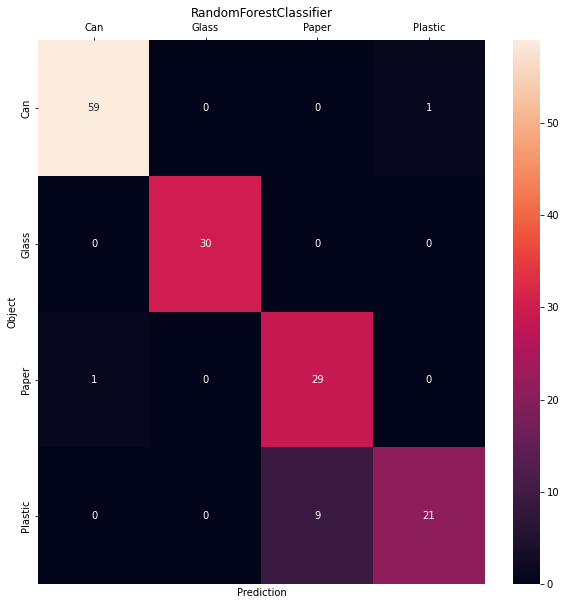

In [34]:
title = 'RandomForestClassifier'
heatmap(rfc_cm, title)

In [35]:
print(Y_train[0])

[1. 0. 0. 0.]


In [36]:
# #For Support Vector Machine
from sklearn.svm import SVC
C = 1
# # svm_clf = SVC(kernel = 'rbf', gamma = 0.7, C=C, max_iter = 10000)
# svm_clf = SVC(kernel='linear')
# svm_clf.fit(X_train, Y_train_cf)
# svm_y_pred=svm_clf.predict(X_test)
# print('Model accuracy score with support vetor machine : {0:0.4f}'. format(accuracy_score(Y_test_cf, svm_y_pred)))

In [37]:
svm_rbf_clf = SVC(kernel = 'rbf', gamma = 0.7, C=C, max_iter = 10000)
svm_rbf_clf.fit(X_Train, Y_Train)
svm_rbf_y_pred=svm_rbf_clf.predict(X_Test)
print('Model accuracy score with support vetor machine : {0:0.4f}'. format(accuracy_score(Y_Test, svm_rbf_y_pred)))

Model accuracy score with support vetor machine : 0.4133


In [38]:
SVM_cm=confusion_matrix(Y_Test, svm_rbf_y_pred)
print(SVM_cm)

[[31 20  0  9]
 [ 0 30  0  0]
 [ 0 30  0  0]
 [ 0 29  0  1]]


In [39]:
pd.set_option('display.max_columns', None)
SVM_df_Y_pred = svm_rbf_y_pred.reshape(5,30)
result_svm = pd.DataFrame(SVM_df_Y_pred, index=row_indices, columns = column_names)
result_svm
result_svm.replace(0, 'Can', inplace=True)
result_svm.replace(1, 'Glass', inplace=True)
result_svm.replace(2, 'Paper', inplace=True)
result_svm.replace(3, 'Plastic', inplace=True)
result_svm.to_csv('/home/joongho/Intelligent_Radar/gui/result/svm_result.csv', sep=',', na_rep='NaN')

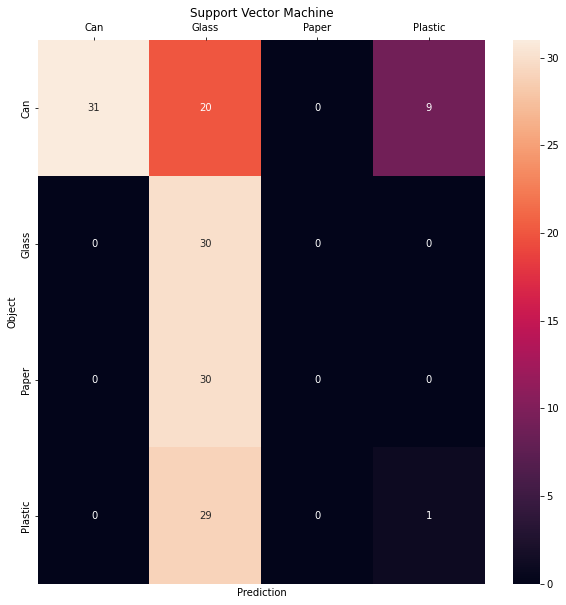

In [40]:
title = 'Support Vector Machine'
heatmap(SVM_cm, title)

In [41]:
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

In [42]:
print(X_train.shape)

(1080, 4)


In [43]:
# conv1d_model = keras.Sequential()
# conv1d_model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation = 'relu', input_shape=(1,6)))
# conv1d_model.add(Dropout(0.1))
# conv1d_model.add(Conv1D(filters=68, kernel_size=1, padding='valid', activation = 'relu'))
# conv1d_model.add(Conv1D(filters=32, kernel_size=1, padding='valid', activation = 'relu'))
# conv1d_model.add(Flatten())
# conv1d_model.add(Dropout(0.2))
# conv1d_model.add(Dense(len(ML.labels_dict),activation='softmax'))

# conv1d_model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
# # conv1d_model.summary()
# conv1d_model.fit(X_train, Y_train, epochs=500, verbose=0, batch_size=20)
# loss, acc = conv1d_model.evaluate(X_test, Y_test)
# result=conv1d_model.predict(X_test)

In [44]:
Y_Train_nn = np.zeros((len(Y_Train), 4))
for i in range(len(Y_Train)):
    Y_Train_nn[i][int(Y_Train[i])] = 1


In [45]:
Y_Test_nn = np.zeros((len(Y_Test), 4))
for i in range(len(Y_Test)):
    Y_Test_nn[i][int(Y_Test[i])] = 1

In [46]:
nn_model = keras.Sequential()
nn_model.add(keras.Input(shape=(X_train_nn.shape[1],)))
nn_model.add(Dense(units=4, activation='relu'))
nn_model.add(Dense(units=36, activation='relu'))
nn_model.add(Dense(units=8, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(units=4, activation='softmax'))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 36)                180       
                                                                 
 dense_2 (Dense)             (None, 8)                 296       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 532
Trainable params: 532
Non-trainable params: 0
_________________________________________________________________


In [47]:
# checkpointer = keras.callbacks.ModelCheckpoint(monitor='val_loss', verbose=1,)
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# nn_model.fit(x=X_train_nn, y=Y_train, batch_size=100, epochs=1000, verbose=2, validation_data=(X_test_nn, Y_test))
nn_model.fit(x=X_Train, y=Y_Train_nn, batch_size=128, epochs=1000, validation_split=0.2)

Epoch 1/1000
6/6 [==============================] - 1s 23ms/step - loss: 1.3906 - accuracy: 0.2554 - val_loss: 1.3824 - val_accuracy: 0.0323
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3824 - accuracy: 0.2930 - val_loss: 1.4008 - val_accuracy: 0.0323
Epoch 3/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3752 - accuracy: 0.3253 - val_loss: 1.4146 - val_accuracy: 0.0323
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 1.3732 - accuracy: 0.3125

2021-12-02 17:54:12.421814: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6/6 [==============================] - 0s 5ms/step - loss: 1.3733 - accuracy: 0.3051 - val_loss: 1.4255 - val_accuracy: 0.0323
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3694 - accuracy: 0.3239 - val_loss: 1.4351 - val_accuracy: 0.0323
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3658 - accuracy: 0.3185 - val_loss: 1.4442 - val_accuracy: 0.0323
Epoch 7/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3607 - accuracy: 0.3441 - val_loss: 1.4556 - val_accuracy: 0.0323
Epoch 8/1000
6/6 [==============================] - 0s 5ms/step - loss: 1.3608 - accuracy: 0.3212 - val_loss: 1.4676 - val_accuracy: 0.0323
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.3557 - accuracy: 0.3414 - val_loss: 1.4797 - val_accuracy: 0.0323
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 1.3551 - accuracy: 0.3306 - val_loss: 1.4912 - val_accuracy: 0.0323
Epoch 11/1000
6/6 [=============

In [48]:
nn_model.evaluate(x=X_Test, y=Y_Test_nn, verbose=1)
# nn_model_pred=nn_model.predict_classes(x=X_test_nn, verbose=1)
y_prob = nn_model.predict(x=X_Test, verbose=1)
nn_model_pred = y_prob.argmax(axis=-1)
print(nn_model_pred)

5/5 [==============================] - 0s 846us/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 1 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
Y_test_nn_class = label_convert(Y_Test_nn)

In [52]:
print(Y_Test_nn)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [63]:
print(Y_test_nn_class)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [64]:
pd.set_option('display.max_columns', None)
NN_df_Y_pred = nn_model_pred.reshape(5,30)
result_ann = pd.DataFrame(NN_df_Y_pred, index=row_indices, columns = column_names)
result_ann
result_ann.replace(0, 'Can', inplace=True)
result_ann.replace(1, 'Glass', inplace=True)
result_ann.replace(2, 'Plastic', inplace=True)
result_ann.replace(3, 'Paper', inplace=True)
result_ann.to_csv('/home/joongho/Intelligent_Radar/gui/result/ann_result.csv', sep=',', na_rep='NaN')

In [54]:
print('Model accuracy score with neural networks : {0:0.4f}'. format(accuracy_score(Y_test_nn_class, nn_model_pred)))


Model accuracy score with neural networks : 0.8600


In [55]:
ANN_cm = confusion_matrix(Y_test_nn_class, nn_model_pred)
print(ANN_cm)

[[60  0  0  0]
 [ 0 30  0  0]
 [ 0  0 30  0]
 [ 0 11 10  9]]


In [60]:
def heatmap(matrix,title):
    df=DF(matrix,index=["Can","Glass","Plastic","Paper"],columns=["Can","Glass","Plastic","Paper"])
    plt.figure(figsize=(10,10))
    sns.heatmap(df, annot=True)
    plt.tick_params(axis='x', top=True, labeltop = True,bottom=False, labelbottom=False)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xlabel("Prediction",position = (0.5,1.0+0.05))
    plt.ylabel("Object")
    plt.title(title) 

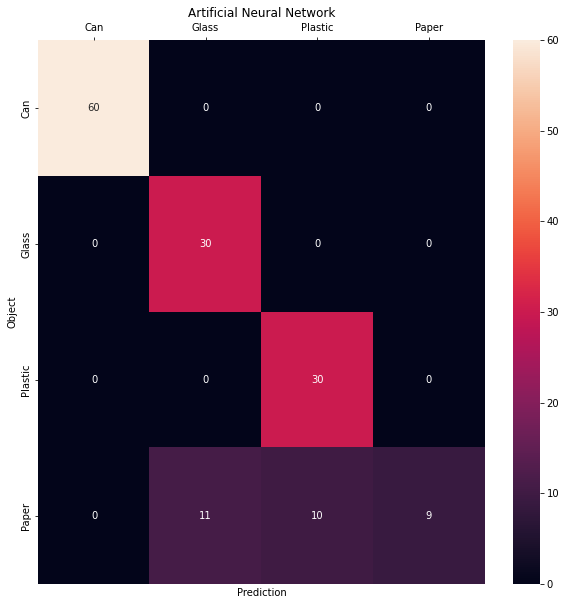

In [61]:
title = 'Artificial Neural Network'
heatmap(ANN_cm, title)
